## SVM implementation through CRNs
The notebook is meant to contain the code implementation of Linear Hard Margin SVMs through CRNs. We shall be utilising various properties like dual-rail encoding, oscillator molecules, approximate majority .etc. to accomplish this.

### Sections 
- Implementation of Linear Hard Margin SVMs
- Making modules to do Linear Hard Margin SVMs

### Implemetation of Linear Hard Margin SVMs

The theory behind SVMs:

[Link to resource](https://www.python-engineer.com/courses/mlfromscratch/07_svm/)

[Another link](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

Cost of just prediction

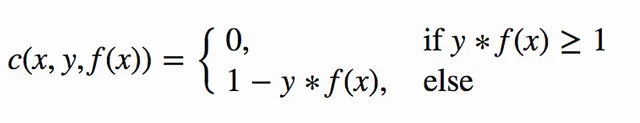

Total cost function

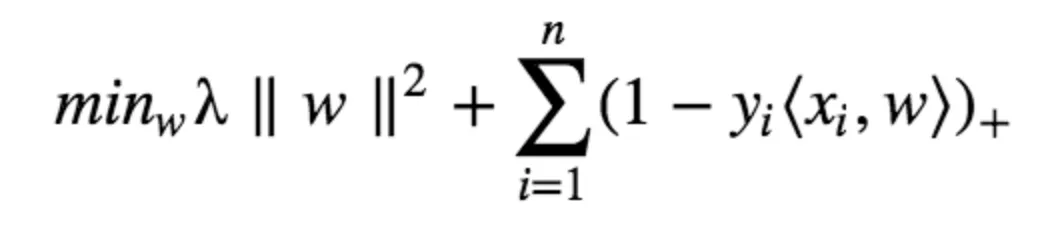


Splitting the cost function in 2 parts. First part derivative is same for both and as follows as for second part. For correctly classified, its 0, otherwise other one.

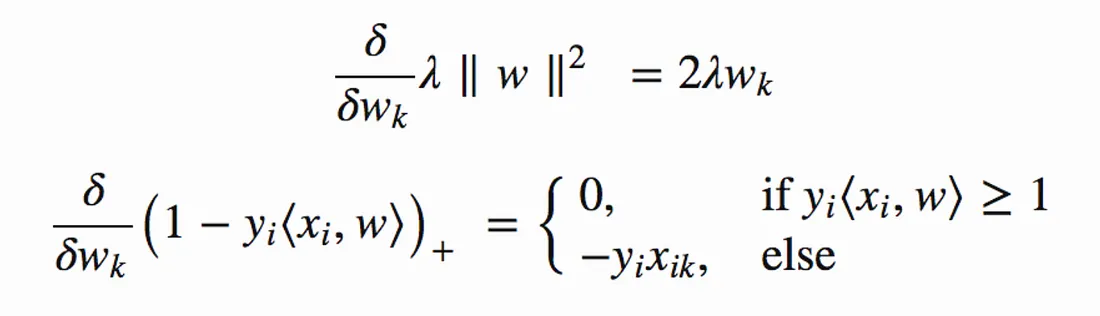


Update for Correctly classified. No update needed for bias in correctly classified (as derivative wrt to b is 0)

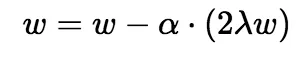

Update for Incorrectly classified.

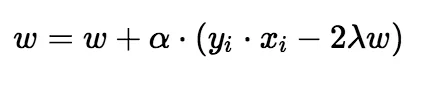

Bias not included in above. If included i.e. wX+b , 
- in correctly classified no update as derivative wrt to b is 0
- in incorrectly classified is simply derivative as belows

Normal Python Implementation

In [1]:
import numpy as np

class SVM():
    def __init__(self, lr = 0.001, epochs = 10000):
        self.w = None
        self.b = None
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i, x in enumerate(X):
                if y[i] * (np.dot(x, self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * 1/self.epochs * self.w)
                else:
                    self.w -= self.lr * (2 * 1/self.epochs * self.w - np.dot(x, y[i]))
                    self.b -= self.lr * y[i]
    
    def show(self):
        print(self.w, self.b)
    
    def loss(self, X, y):
        return 1/2 * np.dot(self.w, self.w) + 1/self.epochs * np.sum(np.maximum(0, 1 - y * (np.dot(X, self.w) - self.b)))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

In [2]:
# case = 1
# X = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
# y = np.array([-1, 1, 1, -1, 1, -1])

# case = 2
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

# case = 3
# data = [
#  [-0.62813787 , 2.17555329],
#  [-2.30928855 , 2.6731255 ],
#  [-2.25663018 , 1.63217428],
#  [ 3.27373362 ,-2.29195267],
#  [-0.65517605 ,-1.65448206],
#  [ 1.60448355 ,-2.28913686]
# ]
# X = np.array(data)
# y = np.array([ 1. , 1.,  1., -1., -1. ,-1.])

case = 4
X = np.array([
    [27.65, 15.65],
    [23.1 , 14.6 ],
    [23.5 , 15.2 ],
    [24.05, 14.9 ],
    [24.5 , 14.7 ],
    [14.15, 17.35],
    [14.3 , 16.8 ],
    [14.3 , 15.75],
    [14.75, 15.1 ],
    [15.35, 15.5 ]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

# X = np.array([
#     [15.35, 15.5 ]
# ])

# y = np.array([ -1])


In [3]:

epochs = 500
lr = 0.0001 # lr * epochs >=1
time_step = 100
ct = 1/500

In [4]:
# # generating a dataset
# np.random.seed(0)
# # X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# # y = np.array([1, 1, 1, -1, -1, -1])

# # X = np.array([[8, 7], [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3]])
# # y = np.array([-1, 1, 1, -1, 1, -1])


# # training the model
# clf = SVM()
# clf.train(X, y)

# # testing the model
# clf.show()

# # showing the model
# clf.show()

# # showing the loss
# # print(clf.loss(X, y)) # 0.0

### Making modules to do Linear Hard Margin SVMs

In [5]:
# making the dataset for train ( same as above )
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

# X = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
# y = np.array([-1, 1, 1, -1, 1, -1])

# X = np.array([[ 2.79645568 ,-2.57295036], [ 1.12243021  ,0.93398757], [ 3.18808289  ,2.61963895], [ 1.64835565, -2.32791661], [ 1.94409439 ,-1.84668899], [ 2.57635389 , 1.7062792 ], [ 0.12287088 ,-0.28360002], [ 2.94053665 ,-3.18556768], [ 1.38852774,  0.61337249]])
# y = np.array([-1 , 1,  1, -1, -1,  1, -1 ,-1,  1])

# idx = len(X)
# X = X[0:idx+1]
# y = y[0:idx+1]
# print(X)
# print(y)

In [6]:
def dual_rail_encoding_arr(x):
    x_p = []
    x_n = []
    for i in x:
        p = []
        n = []

        for j in i:
            if j > 0:
                p.append(j)
                n.append(0)
            else:
                p.append(0)
                n.append(-j)
        x_p.append(p)
        x_n.append(n)
    return x_p, x_n

def dual_rail_encoding_num(x):
    x_p = []
    x_n = []

    for i in x:
        if i > 0:
            x_p.append(i)
            x_n.append(0)
        else:
            x_p.append(0)
            x_n.append(-i)
    return x_p, x_n


In [7]:
X_p, X_n = dual_rail_encoding_arr(X)
Y_p, Y_n = dual_rail_encoding_num(y)
print(X_p, X_n)
print(Y_p, Y_n)

[[27.65, 15.65], [23.1, 14.6], [23.5, 15.2], [24.05, 14.9], [24.5, 14.7], [14.15, 17.35], [14.3, 16.8], [14.3, 15.75], [14.75, 15.1], [15.35, 15.5]] [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [8]:
from scipy.integrate import odeint

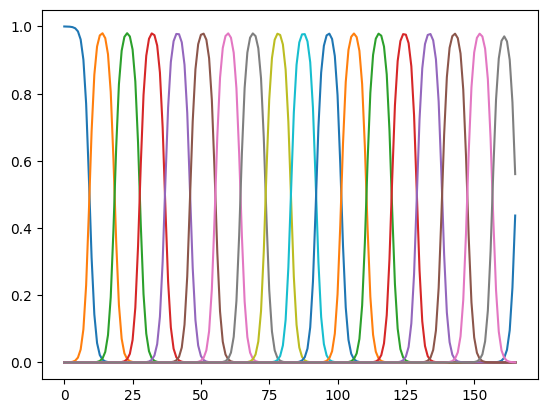

In [9]:
def osciallation(num_species, time_Duration = 165):
    O_t = np.zeros(num_species)
    O_t[0] = 1
    t = np.linspace(0, time_Duration, time_Duration+1)
    dope = 10 ** (-4)
    d_o_T = np.ones(num_species) * dope

    def doped_model(O_t, t,  d_o_T):
        dO_t = np.zeros(num_species)
        dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
        for i in range(1, num_species-1):
            dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
        dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        return dO_t
    
    O = odeint(doped_model, O_t, t, args=(d_o_T,))
    return O


sol = osciallation(18)

# plotting the solution 
import matplotlib.pyplot as plt
plt.plot(sol)
# plt.legend([f"O{i}" for i in range(1, 19)])
plt.show()

In [10]:
# laoding function
def load_f(y,t,a):
    c = y[0]
    dc_dt = -c + a
    return [ dc_dt]

def load_wrapper(a, c, time_start):
    y0 = [c]
    # print(a)
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(load_f, y0, t, args=(a,))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [11]:
# multiplication function
def product_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a*b
    return [ dc_dt]

def product_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(product_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [12]:
# sum
def sum_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a + b
    return [ dc_dt]

def sum_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(sum_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [13]:
# division
def div_f(y,t,a,b):
    c = y[0]
    dc_dt = a - b*c
    return [ dc_dt]

def div_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(div_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [14]:
# comparison
def comparison_f(y, t, a, b):
    dydt = []
    bgta = y[0]
    blta = y[1]

    temp = b*blta - bgta*a
    dydt.append(temp)

    temp = bgta*a - b*blta
    dydt.append(temp)

    return dydt

def Approx_majority (y, t):
    kgtq = y[0]
    kltq = y[1]
    b_help = y[2]

    dydt = []
    
    temp =  - kgtq*kltq + kgtq *b_help
    dydt.append(temp)

    temp = kltq*b_help - kgtq*kltq
    dydt.append(temp)

    temp = 2* kgtq*kltq - kgtq*b_help - kltq*b_help 
    dydt.append(temp)

    return dydt



def comparison_wrapper(a,b,c, time_start):

    bgta = c
    blta = c

    y0 = [bgta, blta]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(comparison_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    bgta = sol[:, 0][-1]
    blta = sol[:, 1][-1]
    help_b = 0

    # print(bgta, blta, help_b)



    y_0_1 = [bgta, blta, help_b]

    t = np.linspace(time_start + time_step , time_start + 2*time_step, time_step+1)

    sol = odeint(Approx_majority, y_0_1, t)
    bgta = sol[:,0][-1]
    blta = sol[:,1][-1]
    help_b = sol[:,2][-1]

    return bgta


In [15]:
print(load_wrapper(8,0,0)) # stores a in c (c = a)
print(product_wrapper(8,2,1,0)) # multiplies a and b and stores it in c (c = a*b)
print(sum_wrapper(8,2,1,0)) # adds a and b and stores it in c (c = a+b)
print(div_wrapper(8,2,1,0)) # divides a by b and stores it in c (c = a/b)
print(comparison_wrapper(2,4,0.5,0))# compares a and b. c is initially 0.5. if a> b, then c = 0 , if b >a, then c =1 , otherwise c=0.5


8.000000000000359
16.000000000000593
10.000000000000325
4.00000000000015
1.0000000000000724


Weights: [ 0.25463066 -0.02957001]
Bias: -4.450246152064178


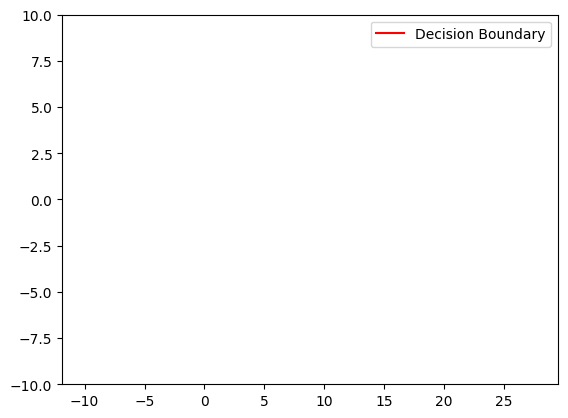

In [16]:
import numpy as np
from sklearn import svm


# Create and train SVM with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model
clf.fit(X, y)

# Extract the optimal weights and bias
weights = clf.coef_[0]
bias = clf.intercept_[0]

print(f"Weights: {weights}")
print(f"Bias: {bias}")

# plotting the decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, weights, bias):
    # Determine the slope and bias of the decision boundary
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

    # Plot the decision boundary
    x = np.linspace(-10, 10, 100)
    y = slope * x + intercept
    plt.plot(x, y, '-r', label='Decision Boundary')
    plt.ylim(-10, 10)
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, weights, bias)


In [ ]:
# weight species W_1 , W_2 (set by looking at the num of features)
# bias species B

w_0_p = 1
w_0_n = 0
w_1_p = 1
w_1_n = 0
b_p = 0
b_n = 0
P_p = 0
P_n = 0
Q_p = 0
Q_n =0

# intermediates
w_0_p_x_p_0 = 0
w_1_p_x_p_1 = 0
w_0_n_x_n_0 = 0
w_1_n_x_n_1 = 0
w_0_p_x_n_0 = 0
w_0_n_x_p_0 = 0
w_1_p_x_n_1 = 0
w_1_n_x_p_1 = 0

# storing the values of intermediates
w_0_p_x_p_0_arr = [w_0_p_x_p_0]
w_1_p_x_p_1_arr = [w_1_p_x_p_1]
w_0_n_x_n_0_arr = [w_0_n_x_n_0]
w_1_n_x_n_1_arr = [w_1_n_x_n_1]
w_0_p_x_n_0_arr = [w_0_p_x_n_0]
w_0_n_x_p_0_arr = [w_0_n_x_p_0]
w_1_p_x_n_1_arr = [w_1_p_x_n_1]
w_1_n_x_p_1_arr = [w_1_n_x_p_1]



w_0_p_arr = [w_0_p]
w_0_n_arr = [w_0_n]
w_1_p_arr = [w_1_p]
w_1_n_arr = [w_1_n]
b_p_arr = [b_p]
b_n_arr = [b_n]
P_p_arr = [P_p]
P_n_arr = [P_n]
Q_p_arr = [Q_p]
Q_n_arr = [Q_n]
loss_arr = [0]



time_index =0 

for t in range(epochs):
    time_start = t*time_step

    for i, x in enumerate(X):
        # defining species here as complexes
        x_p = X_p[i]
        x_p_0 = x_p[0]
        x_p_1 = x_p[1]

        x_n = X_n[i]
        x_n_0 = x_n[0]
        x_n_1 = x_n[1]

        y_p = Y_p[i]
        y_n = Y_n[i]

        x_p_0_y_p = product_wrapper(x_p_0, y_p, 0, time_start)
        x_p_1_y_p = product_wrapper(x_p_1, y_p, 0, time_start)
        x_n_0_y_n = product_wrapper(x_n_0, y_n, 0, time_start)
        x_n_1_y_n = product_wrapper(x_n_1, y_n, 0, time_start)
        x_p_0_y_n = product_wrapper(x_p_0, y_n, 0, time_start)
        x_p_1_y_n = product_wrapper(x_p_1, y_n, 0, time_start)
        x_n_0_y_p = product_wrapper(x_n_0, y_p, 0, time_start)
        x_n_1_y_p = product_wrapper(x_n_1, y_p, 0, time_start)

        # P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        w_0_p_x_p_0 = product_wrapper(w_0_p, x_p_0, w_0_p_x_p_0, time_start)
        w_1_p_x_p_1 = product_wrapper(w_1_p, x_p_1, w_1_p_x_p_1, time_start)
        w_0_n_x_n_0 = product_wrapper(w_0_n, x_n_0, w_0_n_x_n_0, time_start)
        w_1_n_x_n_1 = product_wrapper(w_1_n, x_n_1, w_1_n_x_n_1, time_start)
        P_p = sum_wrapper(w_0_p_x_p_0, w_1_p_x_p_1, P_p, time_start)
        P_p = sum_wrapper(P_p, w_0_n_x_n_0, P_p, time_start)
        P_p = sum_wrapper(P_p, w_1_n_x_n_1, P_p, time_start)
        P_p = sum_wrapper(P_p, b_n, P_p, time_start)
        
        # P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
        w_0_p_x_n_0 = product_wrapper(w_0_p, x_n_0, w_0_p_x_n_0, time_start)
        w_0_n_x_p_0 = product_wrapper(w_0_n, x_p_0, w_0_n_x_p_0, time_start)
        w_1_p_x_n_1 = product_wrapper(w_1_p, x_n_1, w_1_p_x_n_1, time_start)
        w_1_n_x_p_1 = product_wrapper(w_1_n, x_p_1, w_1_n_x_p_1, time_start)
        P_n = sum_wrapper(w_0_p_x_n_0, w_1_p_x_n_1, P_n, time_start)
        P_n = sum_wrapper(P_n, w_0_n_x_p_0, P_n, time_start)
        P_n = sum_wrapper(P_n, w_1_n_x_p_1, P_n, time_start)
        P_n = sum_wrapper(P_n, b_p, P_n, time_start)
        
        temp_1 = 1
        temp_1 = product_wrapper(y_p, P_p, temp_1, time_start)

        temp_2 = 1
        temp_2 = product_wrapper(y_n, P_n, temp_2, time_start)

        temp_3 = 1
        temp_3 = product_wrapper(y_p, P_n, temp_3, time_start)

        temp_4 = 1
        temp_4 = product_wrapper(y_n, P_p, temp_4, time_start)

        # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
        Q_p = sum_wrapper(temp_1, temp_2, Q_p, time_start)
        # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
        Q_n = sum_wrapper(temp_3, temp_4, Q_n, time_start)

        Q_n_t = 1
        Q_n_t = sum_wrapper(Q_n, 1, Q_n_t, time_start)

        const = lr *ct
        const_t = 0

        bgta = comparison_wrapper(Q_p, Q_n_t,0.5,time_start)

        # w_0_p = w_0_p + lr * (2 * ct * w_0_n) + lr * (x_p[0] * Y_p[i] + x_n[0] * Y_n[i]) * bgta
        const_1 = product_wrapper(w_0_n, const, const_t, time_start)
        w_0_p = sum_wrapper(w_0_p, const_1, w_0_p, time_start)
        const_2 = sum_wrapper(x_p_0_y_p, x_n_0_y_n, const_t, time_start)
        const_2 =product_wrapper(const_2, lr, const_t, time_start)
        const_2 = product_wrapper(const_2, bgta, const_2, time_start)
        w_0_p = sum_wrapper(w_0_p, const_2, w_0_p, time_start)

        # w_1_p = w_1_p + lr * (2 * ct * w_1_n) + lr * (x_p[1] * Y_p[i] + x_n[1] * Y_n[i]) * bgta
        const_3 = product_wrapper(w_1_n, const, const_t, time_start)
        w_1_p = sum_wrapper(w_1_p, const_3, w_1_p, time_start)  
        const_4 = sum_wrapper(x_p_1_y_p, x_n_1_y_n, const_t, time_start)
        const_4 =product_wrapper(const_4, lr, const_t, time_start)
        const_4 = product_wrapper(const_4, bgta, const_4, time_start)
        w_1_p = sum_wrapper(w_1_p, const_4, w_1_p, time_start)

        # w_0_n = w_0_n + lr * (2 * ct * w_0_p) + lr * (x_n[0] * Y_p[i] + x_p[0] * Y_n[i]) * bgta
        const_5 = product_wrapper(w_0_p, const, const_t, time_start)
        w_0_n = sum_wrapper(w_0_n, const_5, w_0_n, time_start)
        const_6 = sum_wrapper(x_n_0_y_p, x_p_0_y_n, const_t, time_start)
        const_6 =product_wrapper(const_6, lr, const_t, time_start)
        const_6 = product_wrapper(const_6, bgta, const_6, time_start)
        w_0_n = sum_wrapper(w_0_n, const_6, w_0_n, time_start)

        # w_1_n = w_1_n + lr * (2 * ct * w_1_p) + lr * (x_n[1] * Y_p[i] + x_p[1] * Y_n[i]) * bgta
        const_7 = product_wrapper(w_1_p, const, const_t, time_start)
        w_1_n = sum_wrapper(w_1_n, const_7, w_1_n, time_start)
        const_8 = sum_wrapper(x_n_1_y_p, x_p_1_y_n, const_t, time_start)
        const_8 =product_wrapper(const_8, lr, const_t, time_start)
        const_8 = product_wrapper(const_8, bgta, const_8, time_start)
        w_1_n = sum_wrapper(w_1_n, const_8, w_1_n, time_start)

        # b_p = b_p + lr * Y_n[i] * bgta
        const_9 = product_wrapper(y_p, lr, const_t, time_start)
        const_9 = product_wrapper(const_9, bgta, const_9, time_start)
        b_p = sum_wrapper(b_p, const_9, b_p, time_start)

        # b_n = b_n + lr * Y_p[i] * bgta
        const_10 = product_wrapper(y_n, lr, const_t, time_start)
        const_10 = product_wrapper(const_10, bgta, const_10, time_start)
        b_n = sum_wrapper(b_n, const_10, b_n, time_start)
            
        
        w_0_p_arr.append(w_0_p)
        w_0_n_arr.append(w_0_n)
        w_1_p_arr.append(w_1_p)
        w_1_n_arr.append(w_1_n)
        b_p_arr.append(b_p)
        b_n_arr.append(b_n)
        P_p_arr.append(P_p)
        P_n_arr.append(P_n)
        Q_p_arr.append(Q_p)
        Q_n_arr.append(Q_n)

        w_0_p_x_p_0_arr.append(w_0_p_x_p_0)
        w_1_p_x_p_1_arr.append(w_1_p_x_p_1)
        w_0_n_x_n_0_arr.append(w_0_n_x_n_0)
        w_1_n_x_n_1_arr.append(w_1_n_x_n_1)
        w_0_p_x_n_0_arr.append(w_0_p_x_n_0)
        w_0_n_x_p_0_arr.append(w_0_n_x_p_0)
        w_1_p_x_n_1_arr.append(w_1_p_x_n_1)
        w_1_n_x_p_1_arr.append(w_1_n_x_p_1)

    # finding the loss on y

    # predicting

    y_result = []
    for i, x in enumerate(X):
        x_p = X_p[i]
        x_n = X_n[i]
        y_p = Y_p[i]
        y_n = Y_n[i]

        P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p

    # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
    # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
    
        if P_p - P_n >=0:
            y_result.append(1)
        else:
            y_result.append(-1)
    loss = 0
    for i in range(len(y)):
        if y[i] != y_result[i]:
            loss += 1
    loss_arr.append(loss)


    print(t, end='\r')


        

In [210]:
# # plot the arrays
# import matplotlib.pyplot as plt
# # plt.plot(w_0_p_arr, label = 'w_0_p')
# # plt.plot(w_0_n_arr, label = 'w_0_n')
# # plt.plot(w_1_p_arr, label = 'w_1_p')
# # plt.plot(w_1_n_arr, label = 'w_1_n')
# # plt.plot(loss_arr, label = 'loss')
# # plt.plot(b_p_arr, label = 'b_p')
# # plt.plot(b_n_arr, label = 'b_n')
# plt.plot(P_p_arr[260:280], label = 'P_p')
# plt.plot(P_n_arr[260:280], label = 'P_n')
# # plt.plot(Q_p_arr, label = 'Q_p')
# # plt.plot(Q_n_arr, label = 'Q_n')
# plt.legend()
# plt.show()

In [211]:
w_0 = w_0_p_arr[-1] - w_0_n_arr[-1]
w_1 = w_1_p_arr[-1] - w_1_n_arr[-1]
b = b_p_arr[-1] - b_n_arr[-1]
print(w_0, w_1, b)

0.23556124177012716 -0.30316834162349404 -0.07920004302325243


In [212]:
def net_calc(list1, list2):
    result = [a - b for a, b in zip(list1, list2)]

    return result

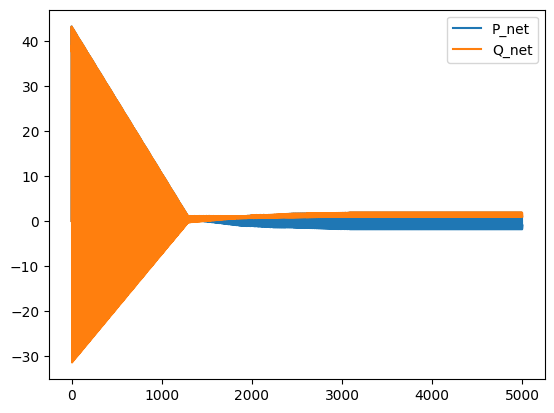

0 0
43.30000000000362 43.30000000000779
37.69999245999472 37.69999245999481
38.69998452000194 38.69998452000565
38.949976630000286 38.94997663000337
39.199968640002226 39.19996864000528
31.499968500003742 -31.499968500006283
31.050680180005003 -31.050680180004445
29.95568818952193 -29.955688189521823
29.71184701813517 -29.71184701813514
30.66133202766408 -30.661332027667594
42.97300078112519 42.9730007811292
37.4146037317967 37.41460373179752
38.40684985521877 38.40684985522235
38.65524977547437 38.65524977547792
38.90357309647796 38.903573096481544
31.257655591018743 -31.257655591022708
30.811702992966747 -30.811702992965802
29.72516567493767 -29.725165674937006
29.483279126456285 -29.48327912645591
30.425171272632454 -30.425171272635172
42.64600252523464 42.64600252523865
37.12921584455411 37.12921584455495
38.11371605426736 38.113716054270974
38.360523789312936 38.360523789316495
38.60717842611565 38.60717842611919
31.01534339816712 -31.01534339817001
30.57272621278728 -30.572726212

In [213]:
p_net = net_calc(P_p_arr, P_n_arr)
q_net = net_calc(Q_p_arr, Q_n_arr)

plt.plot(p_net, label = 'P_net')
plt.plot(q_net, label = 'Q_net')
# plt.plot(P_p_arr[260:280], label = 'P_p')
# plt.plot(P_n_arr[260:280], label = 'P_n')
plt.legend()
plt.show()

for i in range(len(P_p_arr)):
    print(p_net[i], q_net[i])

In [214]:
w1_net = net_calc(w_0_p_arr, w_0_n_arr)
w2_net = net_calc(w_1_p_arr, w_1_n_arr)
print(len(w1_net), len(w2_net))
for i in range(len(p_net)):
    print(w1_net[i], w2_net[i])

5001 5001
1 1
0.9999997999999624 0.9999997999999397
0.9999995999999463 0.9999995999999429
0.9999993999999657 0.9999993999999738
0.9999992000000236 0.9999992000000509
0.9999990000001178 0.9999990000001724
0.9985838000001698 0.9982638000002518
0.997153600283253 0.996583600347417
0.9957234008523766 0.995008401030577
0.9942482017076228 0.9934982020288091
0.9927130028578836 0.9919480033290626
0.9927128043152019 0.9919478049394009
0.9927126057725708 0.9919476065498035
0.9927124072300207 0.9919474081602331
0.992712208687507 0.9919472097707092
0.9927120101451212 0.991947011381284
0.991296815218127 0.9902118175961615
0.9898666182736475 0.9885316211991461
0.9884364181457127 0.9869564211201972
0.9869612227617629 0.9854462260313775
0.9854260270137328 0.9838960305848926
0.9854258299284477 0.9838958338056264
0.9854256328432124 0.9838956370264239
0.9854254357580103 0.9838954402472481
0.9854252386728911 0.9838952434681182
0.9854250415878081 0.9838950466890319
0.9840098433045464 0.9821598484402058
0.98

In [215]:
!pip install cblind

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [216]:
w1_net = net_calc(w_0_p_arr, w_0_n_arr)
w2_net = net_calc(w_1_p_arr, w_1_n_arr)
b_net = net_calc(b_p_arr, b_n_arr)

# remove the first element
w1_net = w1_net[1:]
w2_net = w2_net[1:]
b_net = b_net[1:]  
# take every 10th element
w1_net = w1_net[::10]
w2_net = w2_net[::10]
b_net = b_net[::10]

print(w1_net[-1], w2_net[-1], b_net[-1])
print(len(w1_net), len(w2_net), len(b_net))

0.23556166576880333 -0.3031688873348155 -0.0792000430284219
500 500 500


In [217]:
# write values to a csv file
import csv

with open('svm_weights.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['w1', 'w2', 'b'])
    for i in range(len(w1_net)):
        writer.writerow([w1_net[i], w2_net[i], b_net[i]])

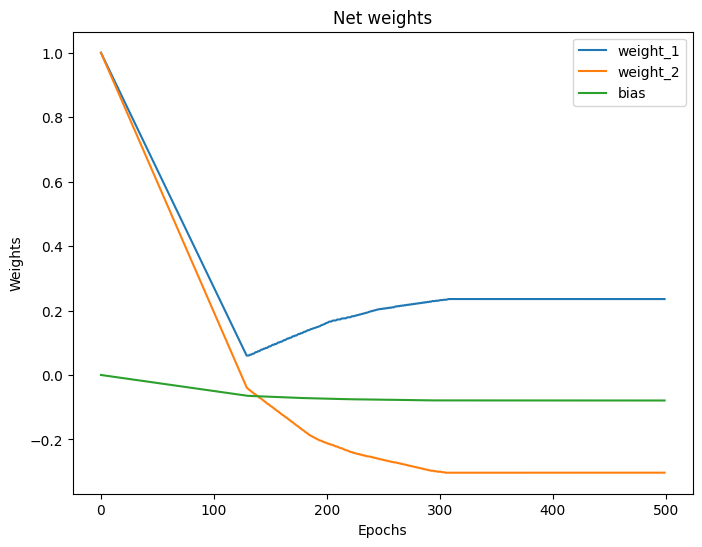

In [218]:
import matplotlib.pyplot as plt

# Define colorblind-friendly colors
color_weight1 = '#377eb8'  # Blue
color_weight2 = '#e41a1c'  # Red

# Plotting the net weights and bias
plt.figure(figsize=(8, 6))
plt.title('Net weights')
plt.plot(w1_net, label='weight_1')
plt.plot(w2_net, label='weight_2')
plt.plot(b_net, label='bias')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.savefig('net_weights.svg', format='svg')
plt.show()

# save as vector graphics


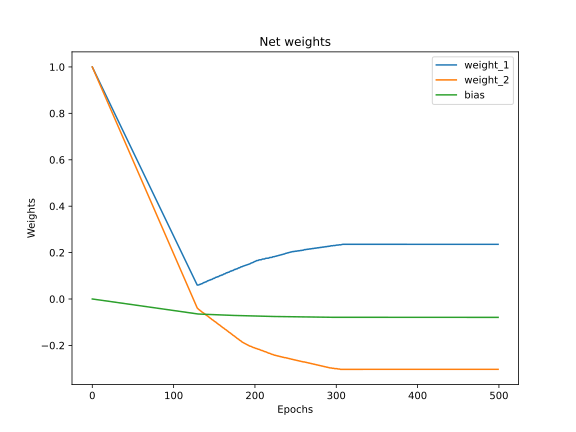

In [219]:
# load the svg file
from IPython.display import SVG
SVG('net_weights.svg')

In [220]:
epoch = 1

for i in range(len(X)):
    idx = (epoch-1)*len(X) + i + 1
    print(w1_net[idx], w2_net[idx])

0.9927128043152019 0.9919478049394009
0.9854258299284477 0.9838958338056264
0.9781388605276258 0.9758438683891268
0.9708519065756498 0.9677919183761229
0.9635649689889482 0.9597399875345347
0.9562780444271403 0.9516880711587657
0.9489911341598056 0.9436361704904518
0.9417042381594233 0.9355842855135295
0.9344173569897828 0.9275324169940455
0.9271304883236744 0.9194805639099888


In [221]:
epoch = 2

for i in range(len(X)):
    idx = (epoch-1)*len(X) + i + 1
    print (w_0_p_arr[idx], w_0_n_arr[idx], w_1_p_arr[idx], w_1_n_arr[idx])

1.0000000043158612 0.007287200000659297 1.000000004939936 0.008052200000535048
1.0000000057732352 0.007287400000664377 1.0000000065503438 0.008052400000540284
1.0000000072306905 0.007287600000669748 1.000000008160779 0.00805260000054584
1.0000000086881824 0.007287800000675412 1.000000009771261 0.008052800000551717
1.0000000101458026 0.007288000000681366 1.000000011381842 0.00805300000055792
1.0000000116034027 0.008703196385275735 1.000000012992442 0.009788195396280485
1.0000000133440416 0.010133395070394131 1.0000000149500812 0.01146839375093509
1.0000000153707207 0.011563597225008028 1.00000001724376 0.013043596123562741
1.0000000176834403 0.013038794921677374 1.0000000198524785 0.014553793821101021
1.0000000202911985 0.01457399327746565 1.0000000227620525 0.01610399217715982


In [222]:
epoch = 2


for i in range(len(X)):
    idx = (epoch-1)*len(X) + i + 1
    print(P_p_arr[idx], P_n_arr[idx])
    # print(p_net[idx], q_net[idx])

43.300500131151544 0.32749935002635705
37.700500171819506 0.28589644002280656
38.70050023524247 0.29365038002369864
38.95050029549829 0.29525052002392016
39.2005003565022 0.29692726002423675
31.500500341037647 0.24284475001890402
31.100600383933436 0.2888973909666877
30.05070042602118 0.32553475108350916
29.850800486990575 0.3675213605342919
30.85090057890695 0.4257293062744949


In [223]:
epoch = 2


for i in range(len(X)):
    idx = (epoch-1)*len(X) + i + 1
    print(w_0_p_x_p_0_arr[idx], w_1_p_x_p_1_arr[idx], w_0_n_x_n_0_arr[idx], w_1_n_x_n_1_arr[idx], w_0_p_x_n_0_arr[idx], w_0_n_x_p_0_arr[idx], w_1_p_x_n_1_arr[idx], w_1_n_x_p_1_arr[idx])

27.65000007903977 15.650000052108554 0.0 0.0 0.0 0.20148555001814447 0.0 0.12601380000832965
23.10000009969531 14.600000072122645 0.0 0.0 0.0 0.16833432001519993 0.0 0.11756212000776603
23.5000001356721 15.200000099565688 0.0 0.0 0.0 0.1712539000156538 0.0 0.12239648000828293
24.050000173898784 14.900000121594902 0.0 0.0 0.0 0.17526678001615462 0.0 0.1199837400080826
24.50000021286137 14.700000143636334 0.0 0.0 0.0 0.17855110001658248 0.0 0.11837616000802523
14.150000143562641 17.350000197475612 0.0 0.0 0.0 0.10312520000960965 0.0 0.1397195500097304
14.300000165929182 16.80000021827227 0.0 0.0 0.0 0.12445570830949525 0.0 0.16444168265759307
14.300000190817498 15.750000235462778 0.0 0.0 0.0 0.14490754950667864 0.0 0.18062720157727832
14.750000226719127 15.100000260380181 0.0 0.0 0.0 0.17056305906889999 0.0 0.19695830146584767
15.35000027144126 15.500000307714062 0.0 0.0 0.0 0.20014550204779755 0.0 0.22558380422710772


In [224]:
# writing w1 and w2  array to a file
import csv
with open('w1_w2.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow('w1,w2'.split(','))
    for i in range(len(w1_net)):
        writer.writerow([w1_net[i], w2_net[i]])

In [225]:
# open the file and read the data
w1_kaggle = []
w2_kaggle = []
with open('w1_w2_kaggle_old.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        w1_kaggle.append(row[0])
        w2_kaggle.append(row[1])
w1_kaggle = w1_kaggle[1:]
w2_kaggle = w2_kaggle[1:]

w1_kaggle = [float(i) for i in w1_kaggle]
w2_kaggle = [float(i) for i in w2_kaggle]


w1_kaggle_osc = []
w2_kaggle_osc = []
with open('w1_w2_kaggle.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        w1_kaggle_osc.append(row[0])
        w2_kaggle_osc.append(row[1])

w1_kaggle_osc = w1_kaggle_osc[1:]
w2_kaggle_osc = w2_kaggle_osc[1:]

w1_kaggle_osc = [float(i) for i in w1_kaggle_osc]
w2_kaggle_osc = [float(i) for i in w2_kaggle_osc]

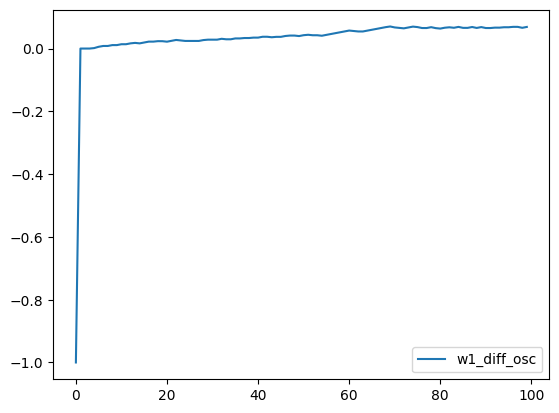

In [226]:
w1_diff_old = net_calc(w1_kaggle, w1_net)
w2_diff_old = net_calc(w2_kaggle, w2_net)

w1_diff = net_calc(w1_kaggle_osc, w1_net)
w2_diff = net_calc(w2_kaggle_osc, w2_net)



# plotting the difference


plt.plot(w1_diff[0:100], label = 'w1_diff_osc')
# plt.plot(w2_diff, label = 'w2_diff_osc')
# plt.plot(w1_diff_old, label = 'w1_diff_old')
# plt.plot(w2_diff_old, label = 'w2_diff_old')
# 
plt.legend()
plt.show()

In [227]:
epoch_t = -1
print(w1_net[epoch_t], w2_net[epoch_t], b_net[epoch_t])

0.23556166576880333 -0.3031688873348155 -0.0792000430284219


In [228]:
# predicting

test_result = []
for i, x in enumerate(X):
    x_p = X_p[i]
    x_n = X_n[i]
    y_p = Y_p[i]
    y_n = Y_n[i]
    

    P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
    P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
    print(P_p, P_n)

    Q_p = Y_p[i]* P_p + Y_n[i] * P_n
    Q_n = Y_p[i]* P_n + Y_n[i] * P_p
    print(Q_p, Q_n)

    if Q_p - Q_n >=1:
        test_result.append(0)
    else:
        test_result.append(1)
    
print(test_result)
  


81.9938370772765 80.14595324571691
81.9938370772765 80.14595324571691
71.0343808854419 69.93997394523173
71.0343808854419 69.93997394523173
72.83431136812567 71.82758093618155
72.83431136812567 71.82758093618155
73.45569246064184 72.2284528432371
73.45569246064184 72.2284528432371
74.03898500385907 72.64510915933306
74.03898500385907 72.64510915933306
57.41048275316124 59.25806186625831
59.25806186625831 57.41048275316124
56.80858506291443 58.45408740185306
58.45408740185306 56.80858506291443
55.07862996315201 56.40580554338596
56.40580554338596 55.07862996315201
54.92051317789962 55.94462677728175
55.94462677728175 54.92051317789962
56.796620759181266 57.80066495015072
57.80066495015072 56.796620759181266
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [229]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Generate mock data (replace this with your actual data)
# w1 = net_calc(w_0_p_arr, w_0_n_arr)
# w2 = net_calc(w_1_p_arr, w_1_n_arr)
# weights_history =  [(w1[i], w2[i]) for i in range(len(w1))]
# bias_history = net_calc(b_p_arr, b_n_arr)

# num_frames = len(weights_history)


# # Set up the plot
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-30, 30)
# ax.set_ylim(-30, 30)

# points = X
# labels = y


# # Initialize scatter plot for points
# scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm')

# # Initialize line for hyperplane
# line, = ax.plot([], [], 'g-', lw=2)

# # Text for displaying current frame
# frame_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

# def init():
#     return scatter, line, frame_text

# def update(frame):
#     # Update hyperplane
#     print(frame, end='\r')
#     w1, w2 = weights_history[frame]
#     b = bias_history[frame]
    
#     x = np.array([-30, 30])
#     y = (-w1 * x - b) / w2
    
#     line.set_data(x, y)
    
#     # Update frame text
#     frame_text.set_text(f'Frame: {frame}')
    
#     return scatter, line, frame_text

# # Create animation
# anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

# plt.title("Hyperplane and Training Points Animation Case: "+ str(case) + " lr =" + str(lr) + " epochs = " + str(epochs))
# plt.show()

# # Uncomment the following line to save the animation as a gif
# title = "hyperplane_animation svm Case: " + str(case)  + "lr =" + str(lr) + " epochs = " + str(epochs) + ".mp4"
# anim.save(title, writer='ffmpeg', fps=30)

In [230]:
# issues
# time_Steps
# oscillations
# mutability
# use load wrapper, whenever species

In [231]:
# def osciallation(num_species, time_Duration = 1000):
#     O_t = np.zeros(num_species)
#     O_t[0] = 1
#     t = np.linspace(0, time_Duration, time_Duration+1)
#     dope = 10 ** (-5)
#     d_o_T = np.ones(num_species) * dope

#     y = []
#     y.extend(O_t)
#     y.extend(d_o_T)

#     def doped_model(y, t,  d_o_T):
#         O_t = y[:num_species]
#         d_o_T = y[num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt = []
#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t)

#         return dydt
    
#     O = odeint(doped_model, y, t, args=(d_o_T,))
#     return O


# sol = osciallation(3)

# # plotting the solution 
# import matplotlib.pyplot as plt
# plt.plot(sol)
# plt.legend(['O1', 'O2', 'O3'])
# plt.show()

In [232]:
# # custom function

# y_0 = [1,2,0,4,5]


# def custom_function_wrapper(y_0):
#     y = y_0

#     o1 = 1
#     o2 = 0
#     o3 = 0
#     o4 = 0
#     y.append(o1)
#     y.append(o2)
#     y.append(o3)
#     y.append(o4)

#     dope = 10 ** (-5)
#     d_o1 = dope
#     d_o2 = dope
#     d_o3 = dope
#     d_o4 = dope

#     y.append(d_o1)
#     y.append(d_o2)
#     y.append(d_o3)
#     y.append(d_o4)
    

#     t = np.linspace(0, 100, 101)
#     def custom_f(y,t):
#         dydt = []
#         dadt = 0
#         dbdt = 0
#         dcdt = y[0]*y[5] + y[1]*y[5] - y[2]*y[5]
#         dddt = 0
#         dedt = y[2]*y[3]*y[8] - y[4]*y[8]
#         dydt = [dadt, dbdt, dcdt, dddt, dedt]

#         # adding the oscillation part
#         num_species = 4
#         O_t = y[-2*num_species : -num_species]
#         d_o_T = y[-num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t) 

#         return dydt

#     sol = odeint(custom_f, y, t)
#     return sol

# # for i in range(100):
# #     sol = custom_function_wrapper(y_0)
# #     y_0 = sol[-1].tolist()

# # print(y_0)

# # print(sol)

# plt.plot(sol)
# plt.legend(['A' , 'B', 'C' , 'D' ,'E'])
# plt.show()

In [233]:
# a = sol[:, 0]
# b = sol[:, 1]
# c = sol[:, 2]
# d = sol[:, 3]
# e = sol[:, 4]

# print(len(a))

# for i in range(len(a)):
#     print(a[i], b[i], c[i], d[i], e[i])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_svm_decision_boundaries(X, y, weights1, bias1, weights2, bias2, labels=("Boundary 1", "Boundary 2")):
#     """
#     Plots two SVM decision boundaries on the same plot with appropriate labels.

#     Parameters:
#         X (numpy.ndarray): 2D array of shape (n_samples, 2) with feature values.
#         y (numpy.ndarray): 1D array of shape (n_samples,) with class labels (0 or 1).
#         weights1 (numpy.ndarray): 1D array of shape (2,) for the first boundary.
#         bias1 (float): Bias term for the first decision boundary.
#         weights2 (numpy.ndarray): 1D array of shape (2,) for the second boundary.
#         bias2 (float): Bias term for the second decision boundary.
#         labels (tuple): Labels for the decision boundaries.
#     """
#     sns.set(style="whitegrid")

#     # Create a mesh grid
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

#     # Compute decision boundary for first model
#     Z1 = weights1[0] * xx + weights1[1] * yy + bias1
#     Z1 = Z1.reshape(xx.shape)

#     # Compute decision boundary for second model
#     Z2 = weights2[0] * xx + weights2[1] * yy + bias2
#     Z2 = Z2.reshape(xx.shape)

#     # Plot the decision boundaries
#     plt.figure(figsize=(8, 6))
#     plt.contour(xx, yy, Z1, levels=[0], colors="black", linewidths=2, label=labels[0])
#     plt.contour(xx, yy, Z2, levels=[0], colors="blue", linewidths=2, linestyles="dashed", label=labels[1])

#     # Plot data points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=70)

#     # Add legend for decision boundaries
#     plt.plot([], [], color="black", linewidth=2, label=labels[0])  # Solid line label
#     plt.plot([], [], color="blue", linewidth=2, linestyle="dashed", label=labels[1])  # Dashed line label

#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.title("Comparison of Two SVM Decision Boundaries")
#     plt.legend()
#     plt.show()

# # Example usage with synthetic data

# from sklearn.datasets import make_classification
# from sklearn.svm import SVC

# # Generate synthetic dataset
# X, y = make_classification(n_samples=12, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

#     # Train first SVM model
# svm1 = SVC(kernel="linear", C=1.0)
# svm1.fit(X, y)
# weights1 = svm1.coef_[0]
# bias1 = svm1.intercept_[0]

#     # Train second SVM model with different parameters
# svm2 = SVC(kernel="linear", C=0.1)  # Different C value
# svm2.fit(X, y)
# weights2 = svm2.coef_[0]
# bias2 = svm2.intercept_[0]

#     # Plot decision boundaries
# plot_svm_decision_boundaries(X, y, weights1, bias1, weights2, bias2, labels=("C=1.0", "C=0.1"))


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features